In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os, traceback, sys, h5py

import pylab as p

np.seterr(all = 'ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
%config InlineBackend.figure_format ='retina'

In [3]:
global_array = np.load('global_array.npy', allow_pickle = True)

global_array

array([[0.0, 100000, 10.000471113157486,
        array([1.04432545, 0.98656749, 0.97007687, ..., 0.97681528, 1.03600732,
               0.9587798 ])                                                    ],
       [25002.35562127433, 100000, 28.209089662317616,
        array([1.07496373, 1.04389155, 1.0347231 , ..., 0.9380676 , 0.97071268,
               0.92772546])                                                    ],
       [50004.71124254866, 100000, 41.323550074231356,
        array([1.15561421, 1.13743443, 1.13205241, ..., 0.87038257, 0.89116941,
               0.86376184])                                                    ],
       ...,
       [9999967156.66207, 13, 931.7302939691788,
        array([1.19835594, 1.20684266, 1.22794033, 1.01563377, 0.60187184,
               1.11911884, 1.19688676, 0.93688892, 1.12422135, 1.10703789,
               1.00004102, 0.57959025, 0.68557043])                       ],
       [9999992159.01769, 13, 931.7294194663035,
        array([1.19835783,

In [4]:
global_droplet_timestamps = np.load('global_droplet_timestamps.npy')

global_droplet_timestamps, len(global_droplet_timestamps)

(array([0.00000000e+00, 2.50023556e+04, 5.00047112e+04, ...,
        9.99996716e+09, 9.99999216e+09, 1.00000172e+10]),
 399964)

In [5]:
AGM_t_max = global_droplet_timestamps[-1]

AGM_t_max

10000017161.373312

In [6]:
global_droplet_number = np.load('global_droplet_number.npy')

global_droplet_number, len(global_droplet_number)

(array([100000, 100000, 100000, ...,     13,     13,     13]), 399964)

Text(0, 0.5, '$\\frac{\\left \\langle R \\right \\rangle}{w}$')

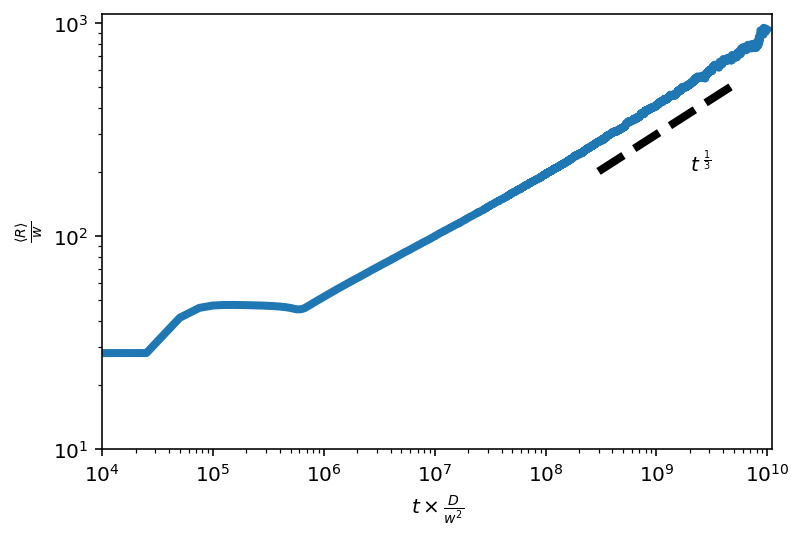

In [7]:
### Plot Coarsening Rate and droplets vs time

plt.loglog(global_droplet_timestamps, global_array[:, 2], linewidth = 4)

dash_x = np.linspace(3e8, 5e9, 100)

plt.loglog(dash_x, 0.3*dash_x**(1/3), '--k', linewidth = 4, label = r'$t^{~\frac{1}{3}}$')

plt.text(2e9, 2e2, r'$t^{~\frac{1}{3}}$', color='k')

##############################################################################################################

plt.xlim(1e4, 1.1e10)

plt.ylim(1e1, 1.1e3)

plt.xlabel(r'$t \times \frac{D}{w^2}$')

plt.ylabel(r'$\frac{\left \langle R \right \rangle}{w}$')

# plt.savefig('LSW.pdf')

# plt.close()

In [8]:
set_fontsize = 30

### HISTOGRAMS

In [9]:
string_folder = str('Histograms')

In [10]:
final_string1 = 'rm -rf '+ string_folder

os.system(final_string1)

final_string2 = 'mkdir '+ string_folder

os.system(final_string2)

0

In [11]:
for snapshot in range(len(global_droplet_timestamps)):
    
    if (int(global_droplet_timestamps[snapshot]) % (1e2) == 0):
        
        plt.style.use('default')

        plt.rcParams['figure.constrained_layout.use'] = True
                
        ###########################################################################################################
        
        plt.figure(figsize = (6, 6))

        yy,binEdges = np.histogram(global_array[snapshot][3], bins = 'auto', density = True)

        bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])

        p.plot(bincenters, yy, 'o', color = 'steelblue', markersize = 15)

        ###########################################################################################################

        rho = np.linspace(0, 1.5, 1000)

        hist_analytics = (4/9)*(rho**2)*(1 + rho/3)**(-7/3)* (1 - 2*rho/3)**(-11/3) * np.exp(1 - 3/(3 - 2*rho))

        plt.plot(rho, hist_analytics, 'k', linewidth = 4, alpha = 0.2)

        ###########################################################################################################

        plt.xlabel(r'$\rho$', fontsize = set_fontsize)

        plt.ylabel(r'$H(\rho)$', fontsize = set_fontsize)

        plt.xlim(0.01, 1.5)

        plt.ylim(0, 2.5)
        
        plt.tick_params(labelsize=set_fontsize)

        path =  "./" + string_folder + '/t_' + str('{:.1e}'.format(global_droplet_timestamps[snapshot])) + '.pdf'

        plt.savefig(path)
        
        if (int(global_droplet_timestamps[snapshot]) % (1e4) == 0):
            
            print('Fig printed at t =', str('{:.1e}'.format(global_droplet_timestamps[snapshot])))

        plt.close()

Fig printed at t = 0.0e+00
Fig printed at t = 5.3e+07
Fig printed at t = 2.7e+08
Fig printed at t = 5.3e+08
Fig printed at t = 8.0e+08
Fig printed at t = 1.1e+09
Fig printed at t = 1.3e+09
Fig printed at t = 1.5e+09
Fig printed at t = 1.8e+09
Fig printed at t = 2.1e+09
Fig printed at t = 2.3e+09
Fig printed at t = 2.5e+09
Fig printed at t = 2.8e+09
Fig printed at t = 3.1e+09
Fig printed at t = 3.3e+09
Fig printed at t = 3.6e+09
Fig printed at t = 3.8e+09
Fig printed at t = 4.1e+09
Fig printed at t = 4.4e+09
Fig printed at t = 4.6e+09
Fig printed at t = 4.8e+09
Fig printed at t = 5.1e+09
Fig printed at t = 5.4e+09
Fig printed at t = 5.6e+09
Fig printed at t = 5.9e+09
Fig printed at t = 6.1e+09
Fig printed at t = 6.4e+09
Fig printed at t = 6.6e+09
Fig printed at t = 6.9e+09
Fig printed at t = 7.2e+09
Fig printed at t = 7.4e+09
Fig printed at t = 7.6e+09
Fig printed at t = 7.9e+09
Fig printed at t = 8.2e+09
Fig printed at t = 8.4e+09
Fig printed at t = 8.4e+09
Fig printed at t = 8.7e+09
F

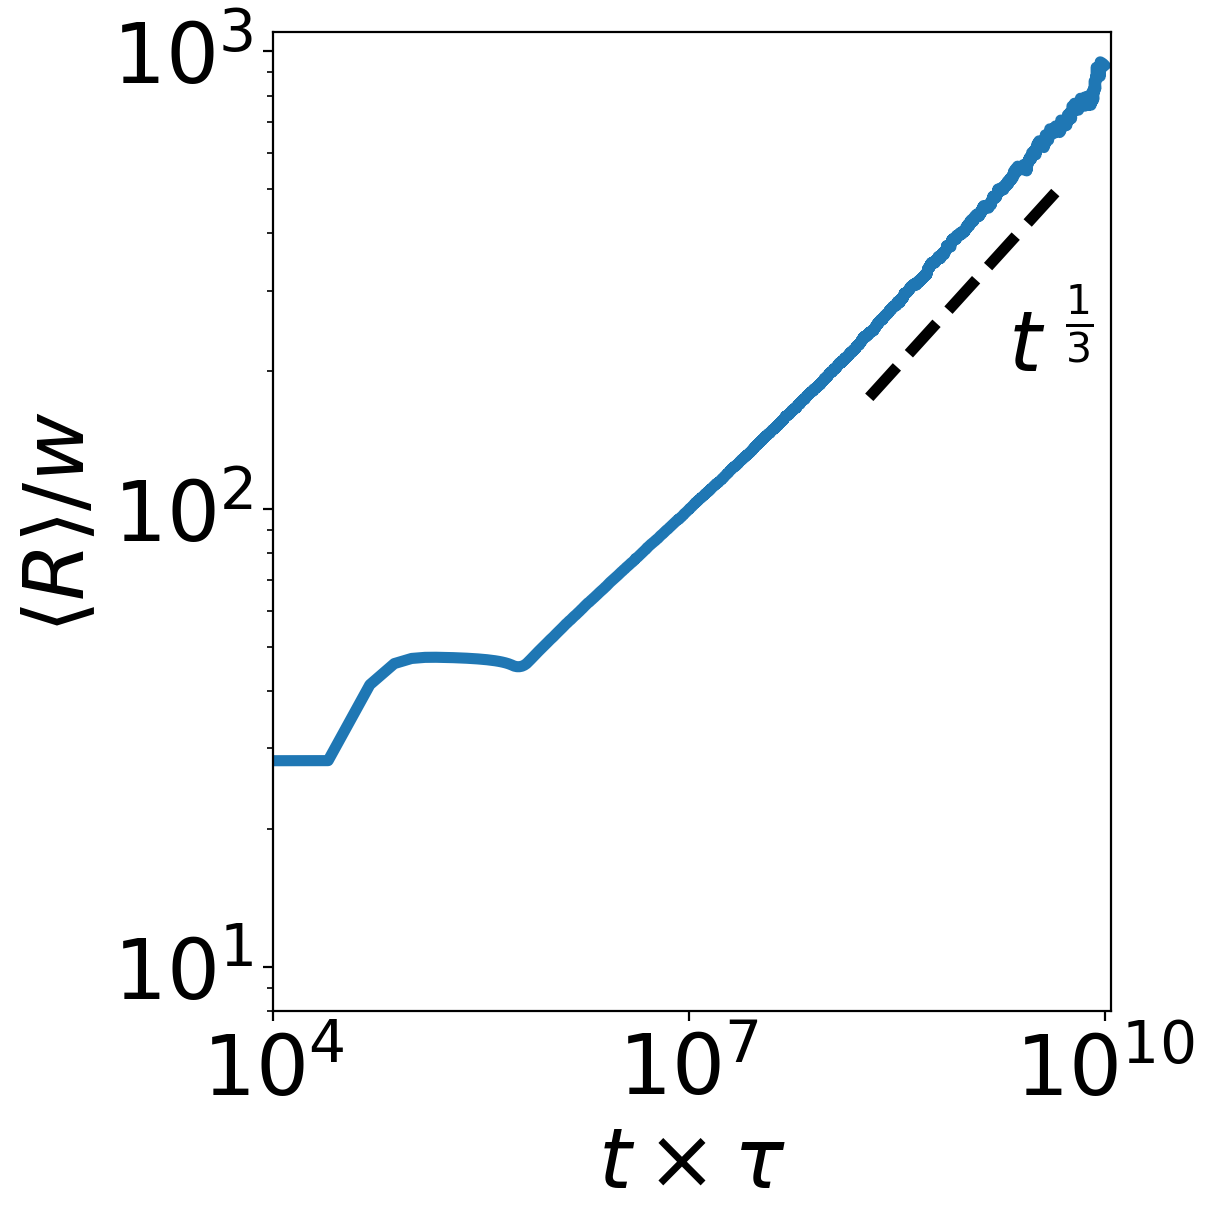

In [15]:
### Plot Coarsening Rate and droplets vs time

plt.figure(figsize=(6, 6))

plt.style.use('default')

plt.rcParams['figure.constrained_layout.use'] = True

##############################################################################################################

plt.loglog(global_droplet_timestamps, global_array[:, 2], linewidth = 4)

dash_x = np.linspace(2e8, 5e9, 100)

plt.loglog(dash_x, 0.3*dash_x**(1/3), '--k', linewidth = 4, label = r'$t^{~\frac{1}{3}}$')

plt.text(2e9, 2e2, r'$t^{~\frac{1}{3}}$', color='k', fontsize = set_fontsize)

##############################################################################################################

plt.xlim(1e4, 1.1e10)

plt.ylim(8, 1.1e3)

plt.xlabel(r'$t \times \tau$', fontsize = set_fontsize)

plt.ylabel(r'$\left \langle R \right \rangle / w$', fontsize = set_fontsize)

plt.tick_params(labelsize=set_fontsize)

plt.savefig('LSW.pdf')

# plt.close()